In [2]:
import os
import xml.etree.ElementTree as ET
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import argparse

In [3]:
annotation_file = ".data/flickr_logos_27_dataset/flickr_logos_27_dataset_images/4771736332.txt"

In [4]:
        with open(annotation_file, "r") as file:
            annotation_list = file.read().split("\n")[:-1]
            annotation_list = [x.split(" ") for x in annotation_list]
            annotation_list = [[float(y) for y in x] for x in annotation_list]

In [5]:
        image_file = annotation_file.replace("txt", "jpg")


In [6]:
        assert os.path.exists(image_file)


In [7]:
        image = Image.open(image_file)


In [8]:
def plot_bounding_box(image, annotation_list, class_id_to_name_mapping):
    annotations = np.array(annotation_list)
    w, h = image.size

    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:, [1, 3]] = annotations[:, [1, 3]] * w
    transformed_annotations[:, [2, 4]] = annotations[:, [2, 4]] * h

    transformed_annotations[:, 1] = transformed_annotations[:, 1] - (
        transformed_annotations[:, 3] / 2
    )
    transformed_annotations[:, 2] = transformed_annotations[:, 2] - (
        transformed_annotations[:, 4] / 2
    )
    transformed_annotations[:, 3] = (
        transformed_annotations[:, 1] + transformed_annotations[:, 3]
    )
    transformed_annotations[:, 4] = (
        transformed_annotations[:, 2] + transformed_annotations[:, 4]
    )

    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0, y0), (x1, y1)))

        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])

    plt.imshow(np.array(image))
    plt.show()

In [10]:
        annotations_path = ".data/flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt"


In [11]:
def get_class_names(path):
    classes = {}
    class_number = -1
    current_class = ""
    with open(path) as f:
        lines = f.readlines()
        class_name = ""
        for line in lines:
            class_name = str(line.split(" ")[1])

            if current_class != class_name:
                class_number += 1
            classes[class_name] = class_number
            current_class = class_name

    return classes

In [12]:
        class_name_to_id_mapping = get_class_names(annotations_path)


In [13]:
        class_id_to_name_mapping = dict(
            zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys())
        )

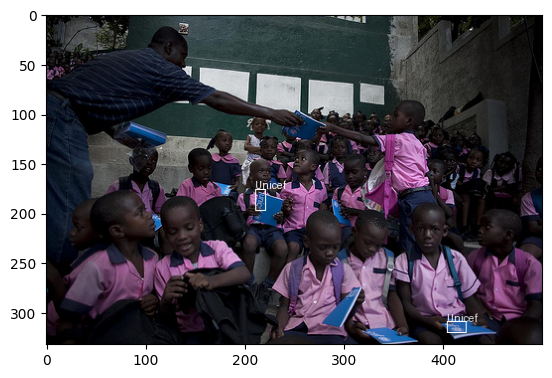

In [14]:
        plot_bounding_box(image, annotation_list, class_id_to_name_mapping)
